In [1]:
import numpy as np

In [2]:
file = 'coordinates_ruwe.csv'

In [3]:
#data_type = np.dtype([('name', 'U29'), ('type', 'U1'),('ra', 'U12'), 
#                      ('dec', 'U12'), ('ruwe', 'float'), ('gaia_id', 'U28')])

data_type = np.dtype([('name', 'U29'), ('type', 'U1'), ('ruwe', 'f')])

In [5]:
data = np.loadtxt(file, dtype = data_type, skiprows = 1,
                  delimiter = ',', usecols = (0, 1, 4))

In [6]:
single = data[(data['type'] == 's')]
binary = data[(data['type'] == 'b')]

In [7]:
print(f'Amount of single stars: {len(single)}\nAmount of binary stars: {len(binary)}')

Amount of single stars: 65
Amount of binary stars: 27


In [8]:
av_ruwe_bin = np.mean(binary['ruwe'])
std_ruwe_bin = np.std(binary['ruwe'])

In [9]:
print(f'Averge RUWE for binary stars is {av_ruwe_bin:.2f}+-{std_ruwe_bin:.2f}')

Averge RUWE for binary stars is 3.98+-3.40


In [10]:
av_ruwe_sin = np.mean(single['ruwe'])
std_ruwe_sin = np.std(single['ruwe'])

In [11]:
print(f'Averge RUWE for single stars is {av_ruwe_sin:.2f}+-{std_ruwe_sin:.2f}')

Averge RUWE for single stars is 2.22+-3.35


In [12]:
good = data[(data['ruwe'] <= 1.4)]
bad = data[(data['ruwe'] > 1.4)]

In [13]:
print(f'Amount of good stars: {len(good)}\nAmount of bad stars: {len(bad)}')

Amount of good stars: 58
Amount of bad stars: 34


In [21]:
#How many stars with ruwe > 1.4 are actually binaries?
true_binary = bad[(bad['type'] == 'b')]
per_tb = len(true_binary)/len(bad) * 100
print(len(bad)+len(good))
print(f'The percentage of stars with RUWE > 1.4 that are actually binaries is {per_tb:.1f}%.')

92
The percentage of stars with RUWE > 1.4 that are actually binaries is 55.9%.


In [15]:
#How many stars with ruwe <= are actually single stars?
true_single = good[(good['type'] == 's')]
per_ts = len(true_single)/len(good) * 100

print(f'The percentage of stars with RUWE <= 1.4 that are actually single stars is {per_ts:.1f}%.')


The percentage of stars with RUWE <= 1.4 that are actually single stars is 86.2%.


In [16]:
#How many binaries have a ruwe > 1.4?
bin_bad_ruwe = binary[(binary['ruwe'] > 1.4)]
per_bin_bad_ruwe = len(bin_bad_ruwe)/len(binary) * 100

print(f'The percentage of binaries with a RUWE > 1.4 is {per_bin_bad_ruwe:.1f}%.')

The percentage of binaries with a RUWE > 1.4 is 70.4%.


In [17]:
#How many single stars have a ruwe <= 1.4?
sin_good_ruwe = single[(single['ruwe'] <= 1.4)]
per_sin_good_ruwe = len(sin_good_ruwe)/len(single) * 100

print(f'The percentage of single stars with a RUWE <= 1.4 is {per_sin_good_ruwe:.1f}%.')

The percentage of single stars with a RUWE <= 1.4 is 76.9%.


In [23]:
data[(data['ruwe'] >= 12)]

array([('2MASSJ12101065-4855476', 's', 16.035),
       ('2MASSJ12480778-4439167', 's', 16.217),
       ('2MASSJ12560830-6926539', 'b', 13.056),
       ('UCAC4_406-011818', 'b', 12.19 ),
       ('UCAC4_461-018326', 's', 15.867)],
      dtype=[('name', '<U29'), ('type', '<U1'), ('ruwe', '<f4')])

(array([68.,  5.,  4.,  7.,  2.,  1.,  0.,  2.,  0.,  3.]),
 array([ 0.75400001,  2.30029988,  3.84659982,  5.39289951,  6.93919945,
         8.48549938, 10.03179932, 11.57809925, 13.12439919, 14.67069912,
        16.21699905]),
 <BarContainer object of 10 artists>)

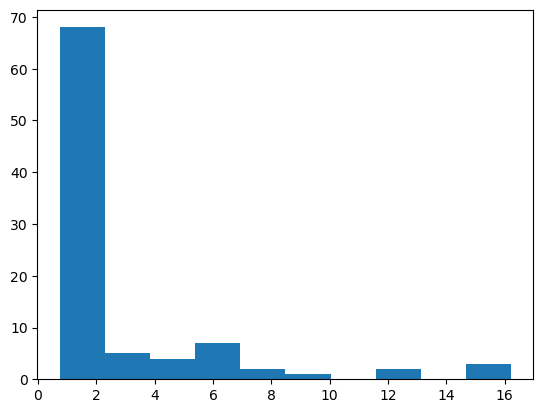

In [25]:
import matplotlib.pyplot as plt
plt.hist(data['ruwe'])